In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
sb.set()
pd.set_option("display.max_rows", None)
quizData = pd.read_csv('quizData_Set_E.csv')
# %matplotlib inline 

## Q1. Print the overall statistical description of the data and plot standard statistical distributions for each variable. Comment : Which variable has most “Normal” looking distribution? Which variable has most number of outliers?

In [2]:
quizData
quizNumData = pd.DataFrame(quizData[['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'pHindex']])
quizNumData.describe()

,FixedAcidity,VolatileAcidity,CitricAcid,pHindex
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,8.326000,0.528665,0.272160,3.309680
std,1.756442,0.181278,0.194516,0.156725
min,4.600000,0.120000,0.000000,2.740000
25%,7.100000,0.390000,0.097500,3.200000
50%,7.900000,0.520000,0.250000,3.300000
75%,9.300000,0.640000,0.420000,3.400000
max,15.900000,1.330000,1.000000,4.010000


<Axes: xlabel='pHindex'>

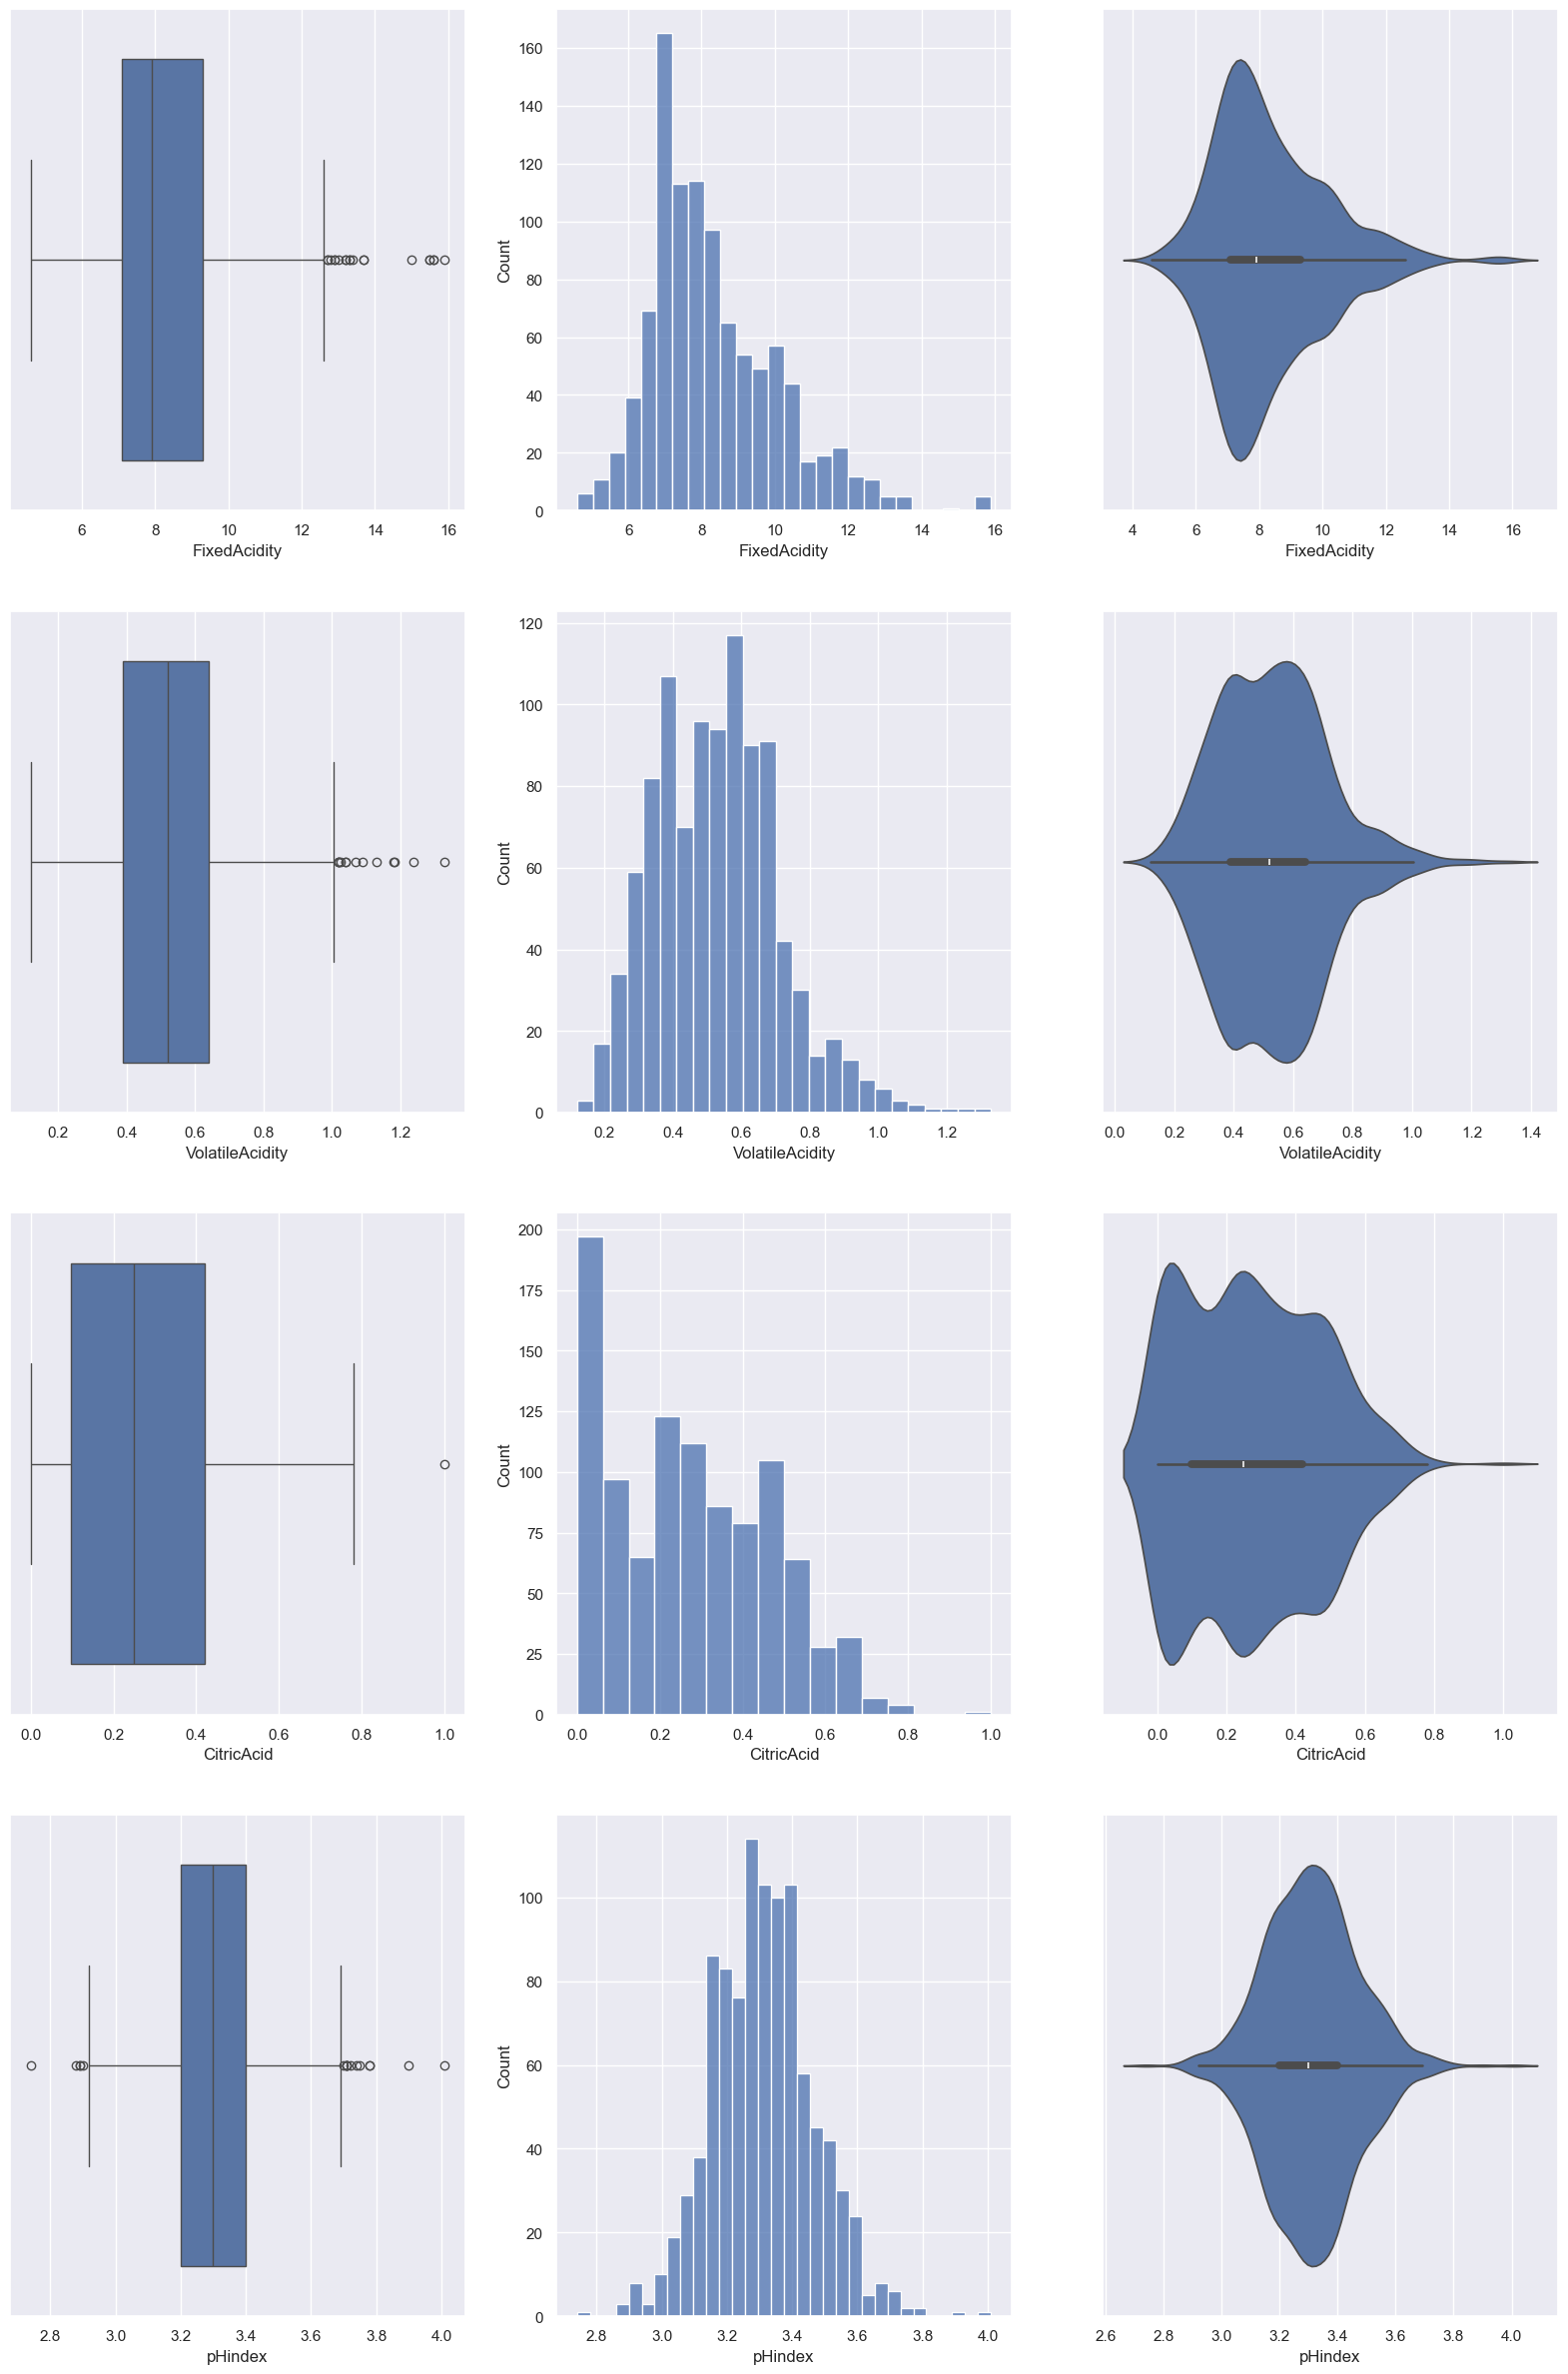

In [3]:
fig , axes = plt.subplots(4, 3, figsize = (20,30))

#sb.boxplot(data = , x = '', ax = )
#sb.histplot(data = , x = '', ax = )
#sb.violinplot(data = , x = '', ax = )

sb.boxplot(data = quizNumData, x = 'FixedAcidity', ax = axes[0, 0])
sb.histplot(data = quizNumData, x = 'FixedAcidity', ax = axes[0, 1])
sb.violinplot(data = quizNumData, x = 'FixedAcidity', ax = axes[0, 2])

sb.boxplot(data = quizNumData, x = 'VolatileAcidity', ax = axes[1, 0])
sb.histplot(data = quizNumData, x = 'VolatileAcidity', ax = axes[1, 1])
sb.violinplot(data = quizNumData, x = 'VolatileAcidity', ax = axes[1, 2])

sb.boxplot(data = quizNumData, x = 'CitricAcid', ax = axes[2, 0])
sb.histplot(data = quizNumData, x = 'CitricAcid', ax = axes[2, 1])
sb.violinplot(data = quizNumData, x = 'CitricAcid', ax = axes[2, 2])

sb.boxplot(data = quizNumData, x = 'pHindex', ax = axes[3, 0])
sb.histplot(data = quizNumData, x = 'pHindex', ax = axes[3, 1])
sb.violinplot(data = quizNumData, x = 'pHindex', ax = axes[3, 2])

phIndex has the most normal distribution based on the skew observed in the histograms. Other 3 variables are positively skewed. 
FixedAcidity seems to have the most outliers based on the number of points outside the whisekers of the boxplot shown above. 

## Q2 Print the mutual correlation amongst all the variables using a correlation heatmap. Which variable has the highest absolute correlation with pHindex? Is such a strong correlation helpful in predicting pHindex?

<Axes: >

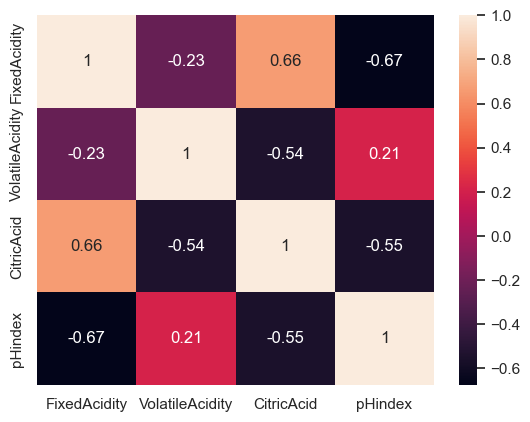

In [4]:
sb.heatmap(quizNumData.corr(), annot = True)

FixedAcidity seems to have the highest correlation with pHindex among the 3 variables. 
However, it cannot be exactly useful to use this variable to predict pHindex as it is only a moderate to strong correlation (<0.7 or -0.7)

## Q3. Visualize the relationship amongst pHindex and the other variables using mutual jointplots and overall pairplot. Which of the variables has the strongest linear relation with pHindex? Is it useful in prediction?

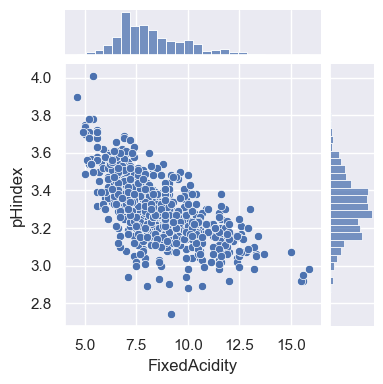

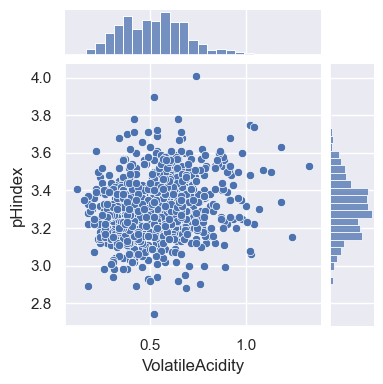

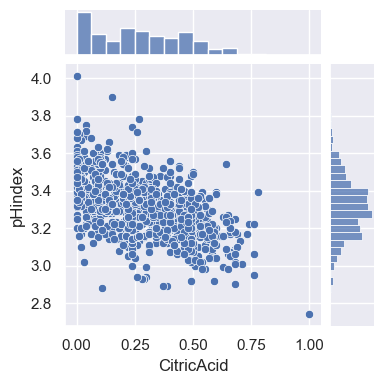

In [5]:
quizFixedAcidity = pd.DataFrame(quizData['FixedAcidity'])
quizVolatileAcidity = pd.DataFrame(quizData['VolatileAcidity'])
quizCitricAcid = pd.DataFrame(quizData['CitricAcid'])
quizpHindex = pd.DataFrame(quizData['pHindex'])


sb.jointplot(x = quizFixedAcidity.squeeze(), y = quizpHindex.squeeze(), height = 4)
sb.jointplot(x = quizVolatileAcidity.squeeze(), y = quizpHindex.squeeze(), height = 4)
sb.jointplot(x = quizCitricAcid.squeeze(), y = quizpHindex.squeeze(), height = 4)

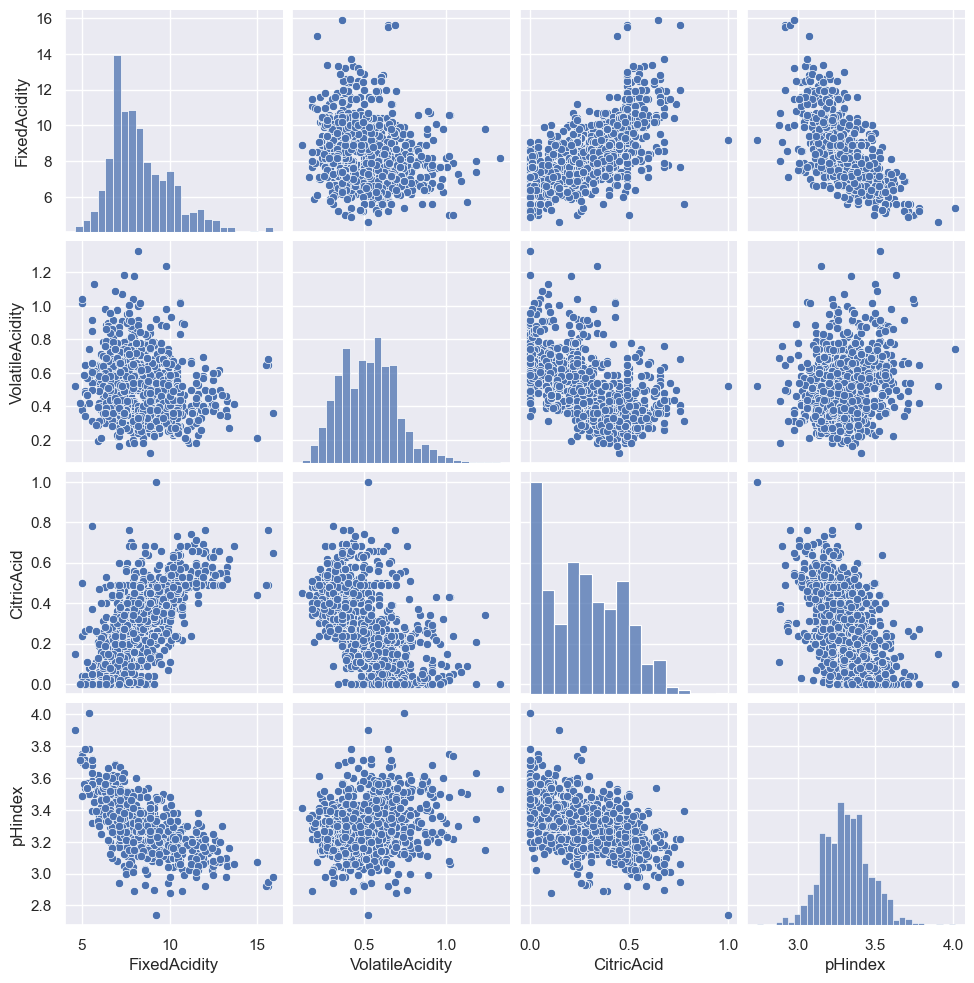

In [6]:
sb.pairplot(data = quizNumData)

The FixedAcidity seems to have the strongest linear relationship with the pHindex. It may deem to be useful in the prediction of it.

## Q4. Partition (randomly split) the dataset randomly into Train and Test datasets – 65% for Train and 35% for Test. On the Train set, fit three uni-variate Linear Regression models for pHindex against each of the three other variables. For each such linear model, print the coefficients of the model you fit, and plot the regression line on a scatterplot.

In [7]:
# quizFixedAcidity = pd.DataFrame(quizData['FixedAcidity'])
# quizVolatileAcidity = pd.DataFrame(quizData['VolatileAcidity'])
# quizCitricAcid = pd.DataFrame(quizData['CitricAcid'])
# quizpHindex = pd.DataFrame(quizData['pHindex'])

FApH = pd.concat([quizFixedAcidity, quizpHindex], axis = 'columns')
VApH = pd.concat([quizVolatileAcidity, quizpHindex], axis = 'columns')
CApH = pd.concat([quizCitricAcid, quizpHindex], axis = 'columns')

In [8]:
from sklearn.linear_model import LinearRegression
LR1 = LinearRegression()
LR2 = LinearRegression()
LR3 = LinearRegression()

In [9]:
from sklearn.model_selection import train_test_split

X1 = pd.DataFrame(quizData['FixedAcidity'])
X2 = pd.DataFrame(quizData['VolatileAcidity'])
X3 = pd.DataFrame(quizData['CitricAcid'])
y1 = pd.DataFrame(quizData['pHindex'])
y2 = pd.DataFrame(quizData['pHindex'])
y3 = pd.DataFrame(quizData['pHindex'])

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.35)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.35)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.35)

print('X1 Train Data: ', X1_train.shape, y1_train.shape)
print('X1 Test Data: ', X1_test.shape, y1_test.shape)
print('X2 Train Data: ', X2_train.shape, y2_train.shape)
print('X2 Test Data: ', X2_test.shape, y2_test.shape)
print('X3 Train Data: ', X3_train.shape, y3_train.shape)
print('X3 Test Data: ', X3_test.shape, y3_test.shape)

X1 Train Data:  (650, 1) (650, 1)
X1 Test Data:  (350, 1) (350, 1)
X2 Train Data:  (650, 1) (650, 1)
X2 Test Data:  (350, 1) (350, 1)
X3 Train Data:  (650, 1) (650, 1)
X3 Test Data:  (350, 1) (350, 1)


In [10]:
LR1.fit(X = X1_train, y = y1_train)
LR2.fit(X = X2_train, y = y2_train)
LR3.fit(X = X3_train, y = y3_train)

LinearRegression()

The coefficient are: y =-0.060246319367725384X + 3.8106419348535523


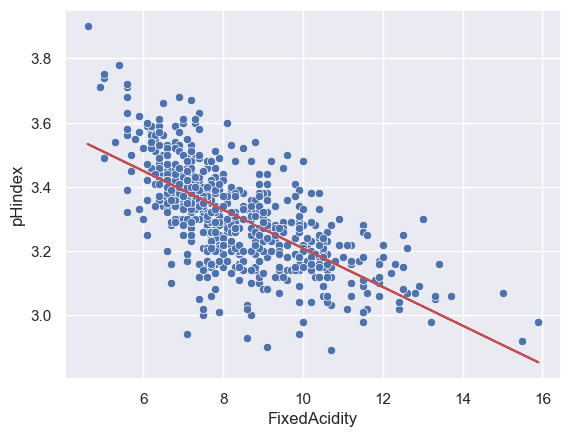

In [11]:
#FixedAcidity
m = LR1.coef_[0][0]
C = LR1.intercept_[0]
print(f"The coefficient are: y ={m}X + {C}")
regline_x = X1_train
regline_y = m * regline_x + C

newFATrainDF = pd.concat([X1_train, y1_train])
sb.scatterplot(data = newFATrainDF, x = 'FixedAcidity', y = 'pHindex')
plt.plot(regline_x,regline_y, 'r')

The coefficient are: y =0.1885629444906988X + 3.2124537003480937


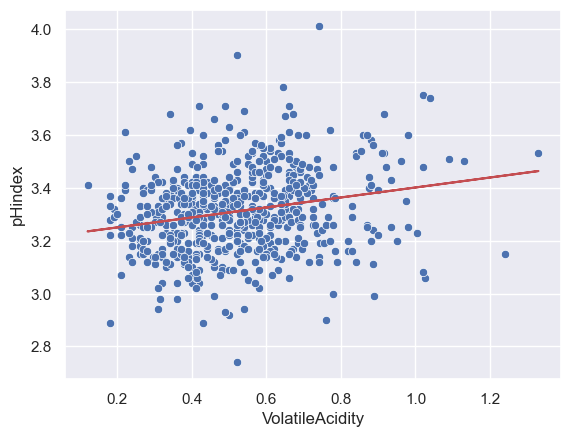

In [12]:
#VolatileAcidity
m = LR2.coef_[0][0]
C = LR2.intercept_[0]
print(f"The coefficient are: y ={m}X + {C}")
regline_x = X2_train
regline_y = m * regline_x + C

newVATrainDF = pd.concat([X2_train, y2_train])
sb.scatterplot(data = newVATrainDF, x = 'VolatileAcidity', y = 'pHindex')
plt.plot(regline_x,regline_y, 'r')

The coefficient are: y =-0.4113820456646057X + 3.423111401116522


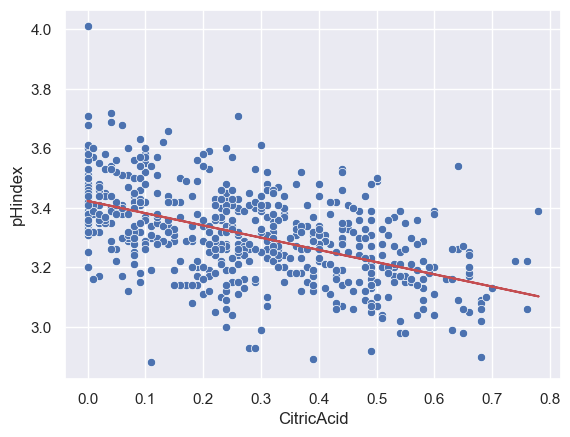

In [13]:
#CitricAcid
m = LR3.coef_[0][0]
C = LR3.intercept_[0]
print(f"The coefficient are: y ={m}X + {C}")
regline_x = X3_train
regline_y = m * regline_x + C

newCATrainDF = pd.concat([X3_train, y3_train])
sb.scatterplot(data = newCATrainDF, x = 'CitricAcid', y = 'pHindex')
plt.plot(regline_x,regline_y, 'r')

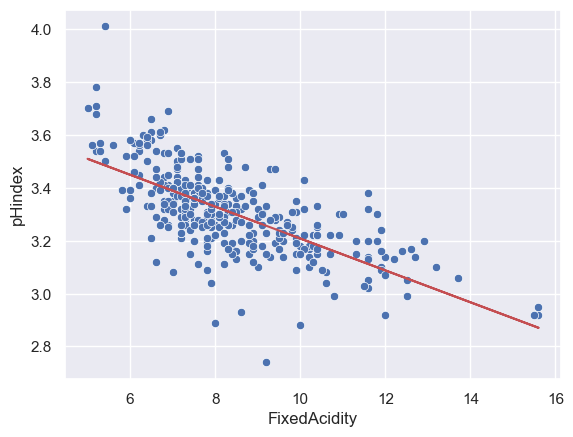

In [14]:
#FixedAcidity
regline_x1 = X1_test
regline_y1 = LR1.predict(regline_x1)
newTest1DF = pd.concat([X1_test, y1_test])
sb.scatterplot(data = newTest1DF, x = 'FixedAcidity', y = 'pHindex')
plt.plot(regline_x1,regline_y1, 'r')

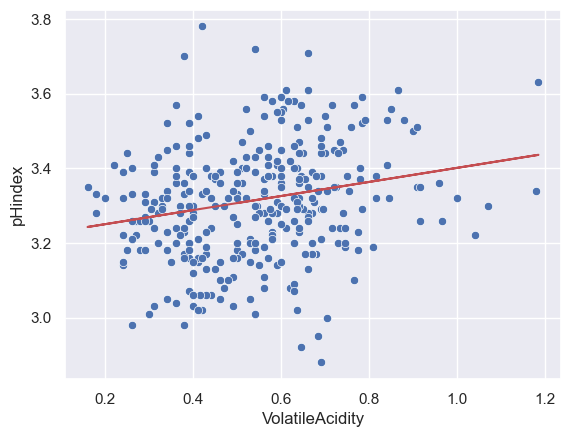

In [15]:
#VolatileAcidity
regline_x2= X2_test
regline_y2 = LR2.predict(regline_x2)
newTest2DF = pd.concat([X2_test, y2_test])
sb.scatterplot(data = newTest2DF, x = 'VolatileAcidity', y = 'pHindex')
plt.plot(regline_x2,regline_y2, 'r')

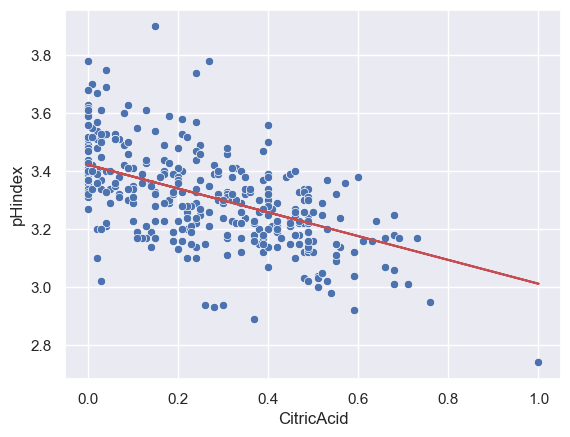

In [16]:
#CitricAcid
regline_x3= X3_test
regline_y3 = LR3.predict(regline_x3)
newTest3DF = pd.concat([X3_test, y3_test])
sb.scatterplot(data = newTest3DF, x = 'CitricAcid', y = 'pHindex')
plt.plot(regline_x3,regline_y3, 'r')

In [17]:
print("Explained Variance of Train Data (FixedAcidity):", LR1.score(X1_train, y1_train))
print("Explained Variance of Test Data (FixedAcidity):", LR1.score(X1_test, y1_test))
print()
print("Explained Variance of Train Data (VolatileAcidity):", LR2.score(X2_train, y2_train))
print("Explained Variance of Test Data (VolatileAcidity):", LR2.score(X2_test, y2_test))
print()
print("Explained Variance of Train Data (CitricAcid):", LR3.score(X3_train, y3_train))
print("Explained Variance of Test Data (CitricAcid):", LR3.score(X3_test, y3_test))

Explained Variance of Train Data (FixedAcidity): 0.44253905517056735
Explained Variance of Test Data (FixedAcidity): 0.47423512166991066

Explained Variance of Train Data (VolatileAcidity): 0.046962656235234324
Explained Variance of Test Data (VolatileAcidity): 0.038931621458671906

Explained Variance of Train Data (CitricAcid): 0.27240743741906326
Explained Variance of Test Data (CitricAcid): 0.34536986504984357


## Q5. Partition the dataset given randomly into Train and Test datasets – 70% for Train and 30% for Test. On the Train set, fit three uni-variate Decision Tree models for Alcohol against each of the three numeric variables, with max_depth = 2. For each such tree model, print the classification accuracy of the model you fit. Also compute the Precision and Recall scores for both train and test datasets.

In [18]:
quiz2Data = pd.read_csv('quizData_Set_F.csv')
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

In [19]:
X1 = pd.DataFrame(quiz2Data['CitricAcid'])
X2 = pd.DataFrame(quiz2Data['Chlorides'])
X3 = pd.DataFrame(quiz2Data['Sulphates'])
y = pd.DataFrame(quiz2Data['Alcohol'])

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = 0.3)
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size = 0.3)

print('X1 Train Data: ', X1_train.shape, y_train.shape)
print('X1 Test Data: ', X1_test.shape, y_test.shape)
print('X2 Train Data: ', X2_train.shape, y_train.shape)
print('X2 Test Data: ', X2_test.shape, y_test.shape)
print('X3 Train Data: ', X3_train.shape, y_train.shape)
print('X3 Test Data: ', X3_test.shape, y_test.shape)

X1 Train Data:  (700, 1) (700, 1)
X1 Test Data:  (300, 1) (300, 1)
X2 Train Data:  (700, 1) (700, 1)
X2 Test Data:  (300, 1) (300, 1)
X3 Train Data:  (700, 1) (700, 1)
X3 Test Data:  (300, 1) (300, 1)


In [20]:
DT1 = DecisionTreeClassifier(max_depth = 2)
DT2 = DecisionTreeClassifier(max_depth = 2)
DT3 = DecisionTreeClassifier(max_depth = 2)
DT1.fit(X = X1_train, y = y_train)
DT2.fit(X = X2_train, y = y_train)
DT3.fit(X = X3_train, y = y_train)

DecisionTreeClassifier(max_depth=2)

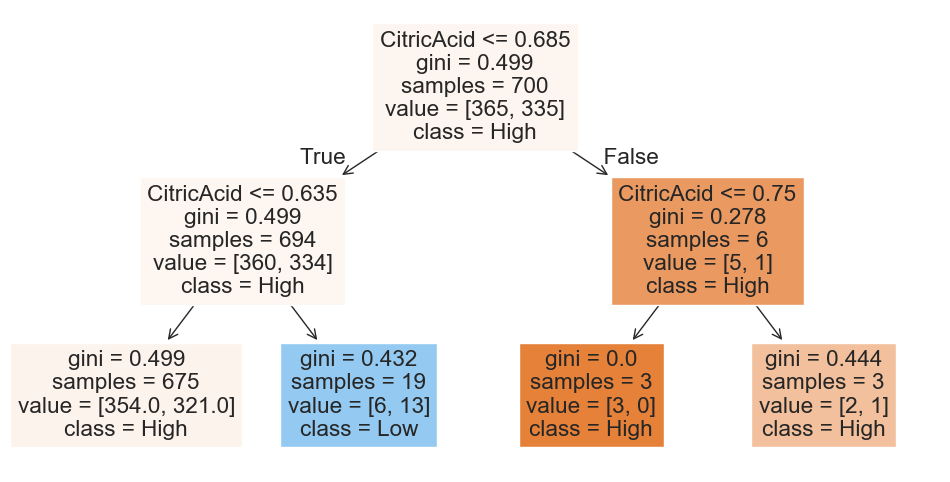

In [21]:
plt.figure(figsize=(12,6))
plot_tree(DT1, filled = True, feature_names = DT1.feature_names_in_, class_names = DT1.classes_);

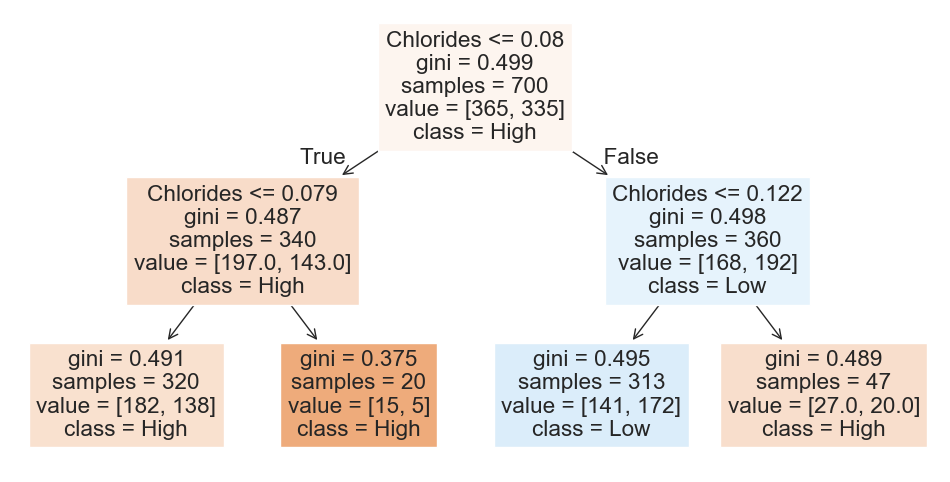

In [22]:
plt.figure(figsize=(12,6))
plot_tree(DT2, filled = True, feature_names = DT2.feature_names_in_, class_names = DT2.classes_);

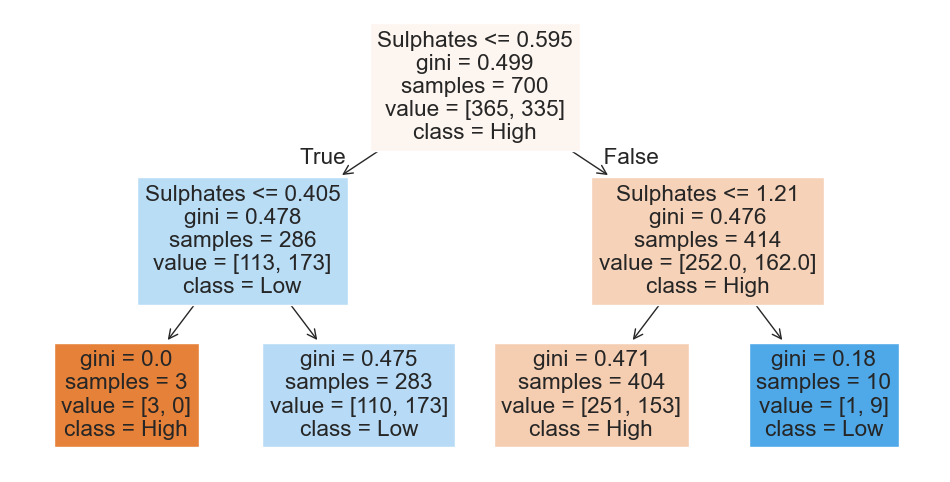

In [23]:
plt.figure(figsize=(12,6))
plot_tree(DT3, filled = True, feature_names = DT3.feature_names_in_, class_names = DT3.classes_);

<Axes: >

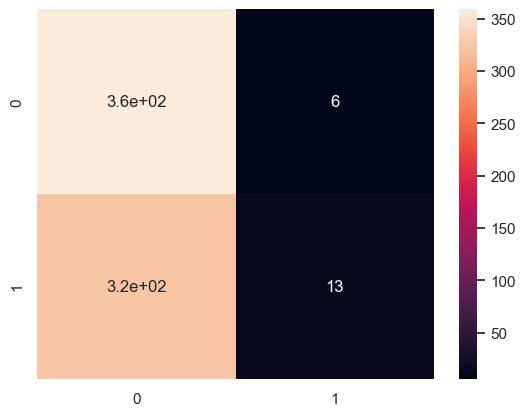

In [24]:
y1_train_pred = DT1.predict(X1_train)
sb.heatmap(confusion_matrix(y_train, y1_train_pred), annot = True)

<Axes: >

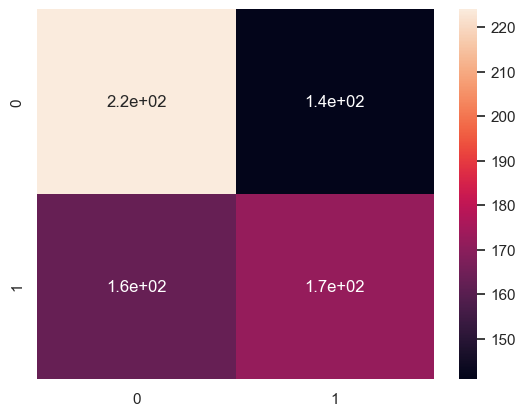

In [25]:
y2_train_pred = DT2.predict(X2_train)
sb.heatmap(confusion_matrix(y_train, y2_train_pred), annot = True)

<Axes: >

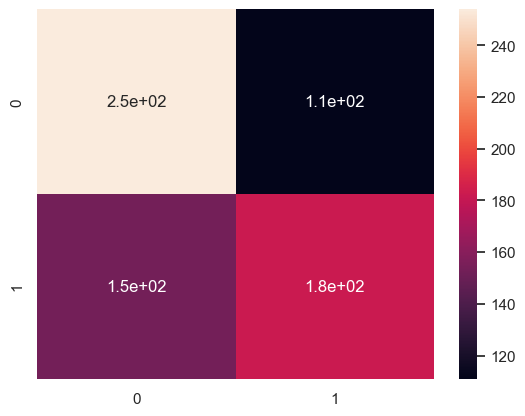

In [26]:
y3_train_pred = DT3.predict(X3_train)
sb.heatmap(confusion_matrix(y_train, y3_train_pred), annot = True)

In [27]:
CM1 = confusion_matrix(y_train, y1_train_pred)

TP = CM1[1][1]
TN = CM1[0][0]
FP = CM1[0][1]
FN = CM1[1][0]

P = TP / (TP + FP)
R = TP / (TP + FN)

print("Train Classification Accuracy \t:", DT1.score(X1_train, y_train))
print("Precision:", P)
print("Recall:", R)

Train Classification Accuracy 	: 0.5314285714285715
Precision: 0.6842105263157895
Recall: 0.03880597014925373


In [28]:
CM2 = confusion_matrix(y_train, y2_train_pred)

TP = CM2[1][1]
TN = CM2[0][0]
FP = CM2[0][1]
FN = CM2[1][0]

P = TP / (TP + FP)
R = TP / (TP + FN)

print("Train Classification Accuracy \t:", DT2.score(X2_train, y_train))
print("Precision:", P)
print("Recall:", R)

Train Classification Accuracy 	: 0.5657142857142857
Precision: 0.549520766773163
Recall: 0.5134328358208955


In [29]:
CM3 = confusion_matrix(y_train, y3_train_pred)

TP = CM3[1][1]
TN = CM3[0][0]
FP = CM3[0][1]
FN = CM3[1][0]

P = TP / (TP + FP)
R = TP / (TP + FN)

print("Train Classification Accuracy \t:", DT3.score(X3_train, y_train))
print("Precision:", P)
print("Recall:", R)

Train Classification Accuracy 	: 0.6228571428571429
Precision: 0.621160409556314
Recall: 0.5432835820895522
